# 03 LAB: Logistic Regression
Due 10/7/25 11:59 pm, moodle submission


## Objectives
- Implement logistic regression in 1D/2D from scratch.
- Visualize decision boundaries and the loss curve.
- Answer short conceptual questions that connect math ↔️ code.




# Lab Cover Sheet

### Students working on this submission (list everyone who contributed)
1. **Name:** `_______________________________`  **Email:** `_______________________________`  
2. **Name:** `_______________________________`  **Email:** `_______________________________`  
3. **Name:** `_______________________________`  **Email:** `_______________________________`  
4. **Name:** `_______________________________`  **Email:** `_______________________________`  

**Submission checklist**  
- [ +] All code cells run without errors.  
- [ +] Plots have labeled axes, units (if any), and legends where appropriate.  
- [+ ] Randomness controlled (seed) or discussed if results vary.  
- [ +] Collaborators listed above;
- [+ ] Responses are in your own words and meet citation/AI-use guidelines.

## 0) Setup (run first)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def logistic_loss(y, p):
    eps = 1e-8
    return -np.mean(y*np.log(p+eps) + (1-y)*np.log(1-p+eps))

## Q1. Gradient of logistic loss (1D)

For $z_i = w x_i + b$, $\hat y_i = \sigma(z_i)$, and labels $y_i\in\{0,1\}$, the average loss is
$L(w,b) = -\frac{1}{N}\sum_i \big[y_i\log \hat y_i + (1-y_i)\log(1-\hat y_i)\big].$

Show that
$\partial L/\partial w = \frac{1}{N}\sum_i (\hat{y}_i - y_i) x_i$ and
$\partial L/\partial b = \frac{1}{N}\sum_i (\hat{y}_i - y_i)$.
Then code these gradients and verify via finite differences (code provided).

### Derivation of Logistic Regression Gradients

We start from the average logistic loss:

$L = -\frac{1}{N} \sum_{i=1}^N \left[ y_i \log(\hat{y}_i) + (1 - y_i)\log(1 - \hat{y}_i) \right]$

where the prediction is:

$\hat{y}_i = \sigma(z_i) = \frac{1}{1 + e^{-z_i}}, \quad z_i = w^T x_i + b$


Derivative of $L$ with respect to $\hat{y}_i$

$\frac{\partial L}{\partial \hat{y}_i}
= -\frac{1}{N} \left( \frac{y_i}{\hat{y}_i} - \frac{1 - y_i}{1 - \hat{y}_i} \right)$

Derivative of $\hat{y}_i$ with respect to $z_i$

Since $\hat{y}_i = \sigma(z_i)$:

$\frac{d\hat{y}_i}{dz_i} = \hat{y}_i (1 - \hat{y}_i)$

Chain rule — combine derivatives

$\frac{\partial L}{\partial z_i}
= \frac{\partial L}{\partial \hat{y}_i} \cdot \frac{d\hat{y}_i}{dz_i}$

Plug in both parts:

$\frac{\partial L}{\partial z_i}
= -\frac{1}{N} \left( \frac{y_i}{\hat{y}_i} - \frac{1 - y_i}{1 - \hat{y}_i} \right)
\hat{y}_i (1 - \hat{y}_i)$

Simplify:

$\frac{\partial L}{\partial z_i} = \frac{1}{N} (\hat{y}_i - y_i)$

Compute gradients with respect to $w$ and $b$

Since $z_i = w^T x_i + b$:

$\frac{\partial z_i}{\partial w} = x_i, \quad \frac{\partial z_i}{\partial b} = 1$

Therefore:

$\frac{\partial L}{\partial w} = \frac{1}{N} \sum_i (\hat{y}_i - y_i) x_i$

$\frac{\partial L}{\partial b} = \frac{1}{N} \sum_i (\hat{y}_i - y_i)$


In [ ]:
def grad_logistic_1d(X, y, w, b):
    # TODO: return dw, db fill in the formulas to compute the gradients
    N= len(X)
    z=w*X+b
    y_pred = sigmoid(z)
    dw = (1/N) * np.sum((y_pred-y)*X)
    db = (1/N) * np.sum(y_pred-y)
    return dw, db

# --- finite-difference check ---
rng = np.random.default_rng(0)
X = np.linspace(0, 5, 6)
y = (X > 2.5).astype(float)
w, b = 0.3, -0.8

def loss_wb(w, b):
    return logistic_loss(y, sigmoid(w*X + b))

dw_fd = (loss_wb(w+1e-5,b)-loss_wb(w-1e-5,b))/(2e-5)
db_fd = (loss_wb(w,b+1e-5)-loss_wb(w,b-1e-5))/(2e-5)

dw, db = grad_logistic_1d(X, y, w, b)
print("dw (analytical, FD) =", dw, dw_fd)
print("db (analytical, FD) =", db, db_fd)
# They should be close.

dw (analytical, FD) = -0.5685833770165587 -0.5685833676660756
db (analytical, FD) = -0.01173553164706444 -0.011735531313394885


## Q2. Train logistic regression in 1D and visualize

Use the dataset below, implement gradient descent, track loss, and plot the sigmoid fit and loss curve.

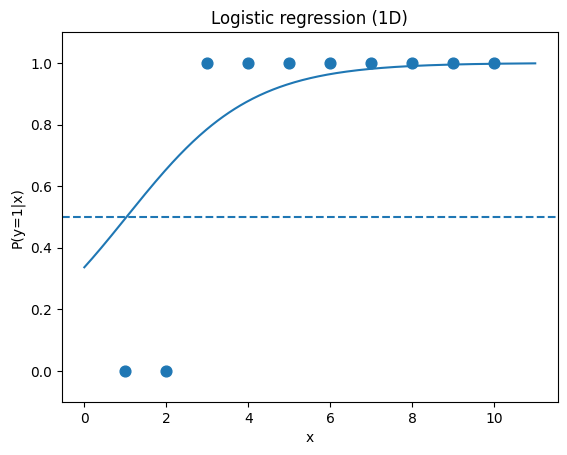

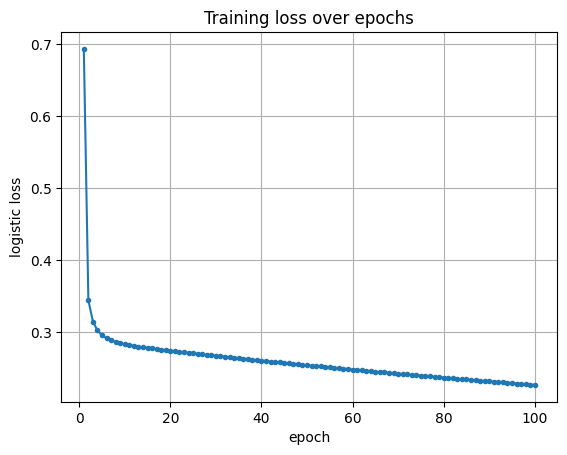

Learned weight w: 0.6597379523623111
Learned bias b: -0.6792183014318419
Decision threshold x*: 1.0295274040242461


In [ ]:
# Data (can play around with n_samples for different data sets)
n_samples = 10
n_class0  = 2
X = np.arange(1, n_samples+1, dtype=float)
y = np.concatenate([np.zeros(n_class0), np.ones(n_samples-n_class0)])

# Parameters
w, b = 0.0, 0.0
lr = 0.1
epochs = 100
loss_hist = []

for epoch in range(epochs):


    z = w * X + b
    # predictions p = sigmoid(w*X + b)
    p = sigmoid(z)

    # Logistic (cross-entropy) loss
    # compute loss and append to loss_hist
    loss = -np.mean(y * np.log(p + 1e-8) + (1 - y) * np.log(1 - p + 1e-8))
    loss_hist.append(loss)


    # Backward pass: compute gradients
    dw = np.mean((p - y) * X)
    db = np.mean(p - y)

    # Parameter w,b update with gradient descent
    w -= lr * dw
    b -= lr * db

# Plot sigmoid fit
xx = np.linspace(0, X.max()+1, 400)
pp = sigmoid(w*xx + b)   # TODO: uncomment when w, b are trained
plt.plot(xx, pp)

plt.scatter(X, y, s=60)
plt.axhline(0.5, ls='--')
plt.ylim(-0.1, 1.1)
plt.xlabel("x"); plt.ylabel("P(y=1|x)")
plt.title("Logistic regression (1D)")
plt.show()

# Plot loss curve
plt.plot(np.arange(1, epochs+1), loss_hist, marker='o', ms=3)
plt.xlabel("epoch"); plt.ylabel("logistic loss")
plt.title("Training loss over epochs")
plt.grid(True); plt.show()

# TODO (explain in text) :
# Report the learned (w, b) and compute threshold x* where w*x + b = 0.

print("Learned weight w:", w)
print("Learned bias b:", b)

x_star = -b / w
print("Decision threshold x*:", x_star)


Weight \(w=0.6597379523623111\) controls how strongly the input \( x \) affects the model's prediction.  
- A positive \( w \) means that as \( x \) increases, the predicted probability of class 1 increases.  
- Larger magnitude means a steeper sigmoid curve (more confident predictions).

Bias \( b = -0.6792 \) shifts the sigmoid curve right along the x-axis, meaning the model needs a larger \( x \) to predict class 1 with probability 0.5.


The decision threshold is the point where the model predicts 0.5, or the boundary between class 0 and class 1:

$$
\hat{y} = \sigma(w x + b) = 0.5
$$

Since the sigmoid function satisfies $\sigma(z) = 0.5$ when $z = 0$, we solve:

$$
w \cdot x^* + b = 0 \quad \Rightarrow \quad x^* = -\frac{b}{w}
$$

Here, $x^*$ represents the x-value at which the model switches from predicting class 0 to class 1, which is 1.0295274040242461.
- For \( x < 1.03 \), the model predicts class 0 (probability < 0.5).  
- For \( x > 1.03 \), the model predicts class 1 (probability > 0.5).








## Q3. 2D data + decision boundary

Create a simple 2D dataset, train a vectorized logistic regression, and plot the boundary where \(p=0.5\).

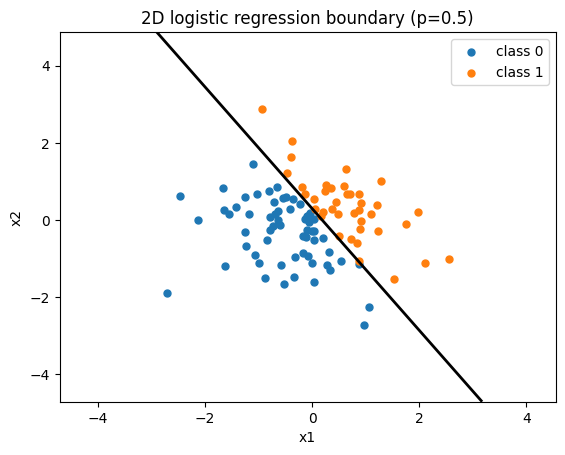

In [ ]:
# Make 2D toy data
rng = np.random.default_rng(1)
N = 100
X2 = rng.normal(0, 1, size=(N,2))
y2 = (X2[:,0] + 0.6*X2[:,1] > 0.2).astype(float)

# Vectorized training (augment with bias)
X2_aug = np.c_[X2, np.ones(N)]
W = np.zeros(3)  # [w1, w2, b]
lr = 0.5
epochs = 200
loss_hist2 = []

for epoch in range(epochs):
    # TODO: compute probabilities
    p = sigmoid(X2_aug @ W)
    # TODO: compute loss and append
    loss = -np.mean(y2 * np.log(p + 1e-8) + (1 - y2) * np.log(1 - p + 1e-8))
    loss_hist2.append(loss)
    # TODO: compute gradient and update W
    grad = X2_aug.T @ (p - y2) / N
    W -= lr * grad




# Plot boundary (p=0.5)
xx, yy = np.meshgrid(np.linspace(X2[:,0].min()-2, X2[:,0].max()+2, 300),
                     np.linspace(X2[:,1].min()-2, X2[:,1].max()+2, 300))
grid = np.c_[xx.ravel(), yy.ravel(), np.ones(xx.size)]
pp = sigmoid(grid @ W).reshape(xx.shape)  # TODO: uncomment when W trained
plt.contour(xx, yy, pp, levels=[0.5], colors='k', linewidths=2)
plt.scatter(X2[y2==0,0], X2[y2==0,1], s=25, label="class 0")
plt.scatter(X2[y2==1,0], X2[y2==1,1], s=25, label="class 1")
plt.legend(); plt.title("2D logistic regression boundary (p=0.5)")
plt.xlabel("x1"); plt.ylabel("x2")
plt.show()



# Why is the 0.5 contour linear?
We are using a logistic regression model with two inputs \(x_1, x_2\) and a bias \(b\):

$
\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)
$

Here, the sigmoid function is:

$
\sigma(z) = \frac{1}{1 + e^{-z}}
$


The decision boundary is where the model predicts probability 0.5:

$
\hat{y} = 0.5 \quad means  \quad \sigma(w_1 x_1 + w_2 x_2 + b) = 0.5
$

Since $\sigma(z) = 0.5$ when $z = 0$, this gives:

$
w_1 x_1 + w_2 x_2 + b = 0
$

The above equation is just a linear equation in $(x_1, x_2)$, which can be rearranged as:

$
x_2 = -\frac{w_1}{w_2} x_1 - \frac{b}{w_2}
$

This is the equation of a straight line.
So any point on this line has predicted probability 0.5. Points above the line $(w_1 x_1 + w_2 x_2 + b > 0)$ have $\hat{y} > 0.5$, predicted as class 1. And points below the line $(w_1 x_1 + w_2 x_2 + b < 0)$ have $\hat{y} < 0.5$, predicted as class 0.  


## Q4. Add L2 regularization

Modify training to include L2 penalty $\frac{\lambda}{2}\|w\|_2^2$ on weights (not bias) and compare boundaries.

lambda=0.0: W=[ 5.42331281  3.42068398 -0.98471083]


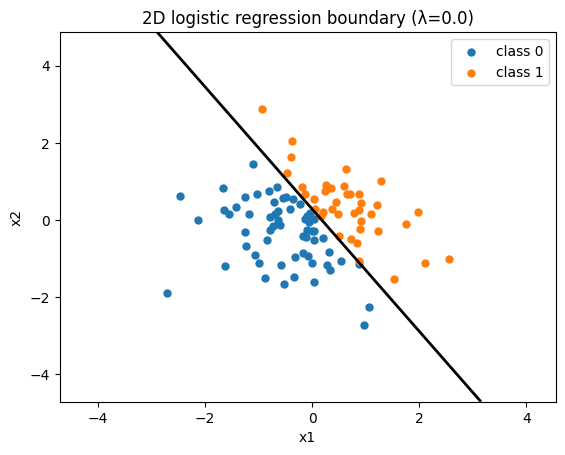

lambda=0.1: W=[ 1.16374473  0.76500614 -0.4536078 ]


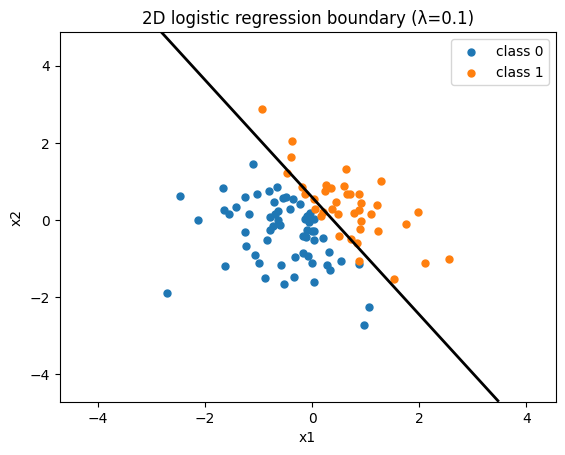

lambda=1.0: W=[ 0.23978934  0.14551503 -0.42587641]


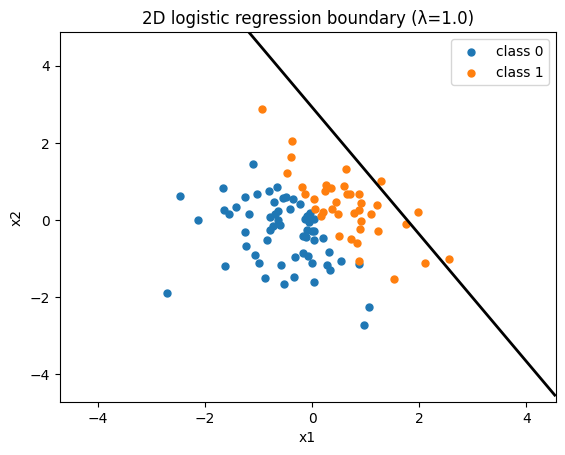

In [ ]:
def train_2d_logreg_L2(X2, y2, lr=0.5, epochs=200, lam=0.0):
    N = X2.shape[0]
    X_aug = np.c_[X2, np.ones(N)]
    W = np.zeros(3)
    hist = []
    for _ in range(epochs):
        # TODO: compute probabilities, loss, gradient
        # Hint: add lam*W[:,2] to gradient of weights (not bias)
        p = sigmoid(X_aug @ W)
        loss = -np.mean(y2 * np.log(p + 1e-8) + (1 - y2) * np.log(1 - p + 1e-8)) + (lam/2) * np.sum(W[:2] ** 2)
        hist.append(loss)
        grad = X_aug.T @ (p - y2) / N
        grad[:2]+= lam*W[:2]
        W -= lr * grad
    return W, hist

# TODO:
# Try a few lambdas
for lam in [0.0, 0.1, 1.0]:
    W, hist = train_2d_logreg_L2(X2, y2, lr=0.5, epochs=300, lam=lam)
    print(f"lambda={lam}: W={W}")

    # plot boundary for each lambda
    xx, yy = np.meshgrid(np.linspace(X2[:,0].min()-2, X2[:,0].max()+2, 300),
                     np.linspace(X2[:,1].min()-2, X2[:,1].max()+2, 300))
    grid = np.c_[xx.ravel(), yy.ravel(), np.ones(xx.size)]
    pp = sigmoid(grid @ W).reshape(xx.shape)  # TODO: uncomment when W trained
    plt.contour(xx, yy, pp, levels=[0.5], colors='k', linewidths=2)
    plt.scatter(X2[y2==0,0], X2[y2==0,1], s=25, label="class 0")
    plt.scatter(X2[y2==1,0], X2[y2==1,1], s=25, label="class 1")
    plt.legend(); plt.title(f"2D logistic regression boundary (λ={lam})")
    plt.xlabel("x1"); plt.ylabel("x2")
    plt.show()

# TODO (explain in text):
# Describe how increasing λ affects |W| and the boundary.

When λ = 0.0 (no regularization)

$
W = [w_1, w_2, b] = [5.4233, 3.4207, -0.9847]
$

Weights $(w_1 = 5.42, w_2 = 3.42)$ are large, sigmoid curve is steep.
- Bias: \(b = -0.98\) sets where the decision boundary crosses the axes.
- The decision line is tilted and aggressive, model fits training data closely, which is a sign that we may overfit.

When λ = 0.1 (small regularization)

$
W = [1.1637, 0.7650, -0.4536]
$

Weights shrink about 4 -5 times smaller → flatter sigmoid curve. Bias also shrinks slightly (not regularized). Model fits more smoothly, less confident, wider transition region.

 When λ = 1.0 (strong regularization)

$
W = [0.2398, 0.1455, -0.4259]
$

Weights are near zero so slope of decision line almost flat.
Bias dominates, decision boundary mostly shifts horizontally. The line moves rather than tilts because weights are heavily penalized.

Increasing λ shrinks the weights, reduces model complexity, and smooths the decision surface. The bias controls horizontal shifts, while the sigmoid's nonlinearity does not curve the boundary.

# Q5. Nonlinear data & features: choose one options from below to explore a new idea on your own

### A. Concentric circles
- **Data:** Generate two concentric circles with noise (e.g., `make_circles(n=800, noise=0.1, factor=0.5)`).
- **Tasks:**
  1. Fit a **linear** logistic model and plot the decision boundary (probability contours + 0.5 line). Report validation **accuracy** and **log loss**.
  2. Add **polynomial features** (degree 2: $x_1^2, x_1x_2, x_2^2$) and retrain. Re-plot the boundary and re-report metrics.
  3. **Compare:** Did log loss drop? Explain why a linear boundary fails on this dataset and how quadratic features help.

### B. XOR pattern
- **Data:** Create an **XOR** dataset in $[-1,1]^2$ with light label noise.
- **Tasks:**
  1. Fit a **linear** logistic model. Plot boundary; report accuracy and log loss. Why does the linear boundary fail?
  2. Add degree-2 polynomial features and retrain. Plot the new boundary and report metrics.
  3. **Compare:** How much did log loss improve? Which polynomial terms are most helpful here?

### C. Your own feature engineering (one idea)
- Propose **one** handcrafted feature (e.g., a radial term $r^2 = x_1^2 + x_2^2$, or a product $x_1x_2$).  
- Retrain the **linear** logistic model **with** your new feature (and standardization).  
- **Report:** change in log loss (Δlogloss) and show the updated boundary.

### What to hand in
- 2–4 plots total: decision boundaries (linear vs poly) for circles and XOR, with readable legends.
- A short paragraph for your dataset answering:
  - What changed in the boundary and **why**?
  - Which metrics improved (especially **log loss**) and by how much?
  - Which engineered feature(s) helped the most?


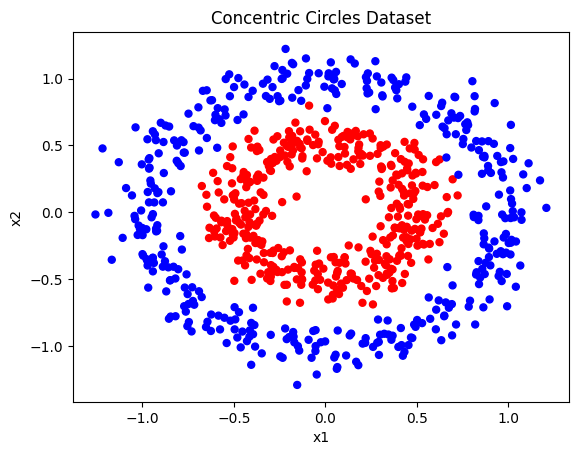

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split



#making circles
X, y = make_circles(n_samples=800, noise=0.1, factor=0.5, random_state=42)
#separating into 70% train data and 30% test data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', s=25)
plt.xlabel("x1"); plt.ylabel("x2")
plt.title("Concentric Circles Dataset")
plt.show()

Linear model log loss: 0.6927


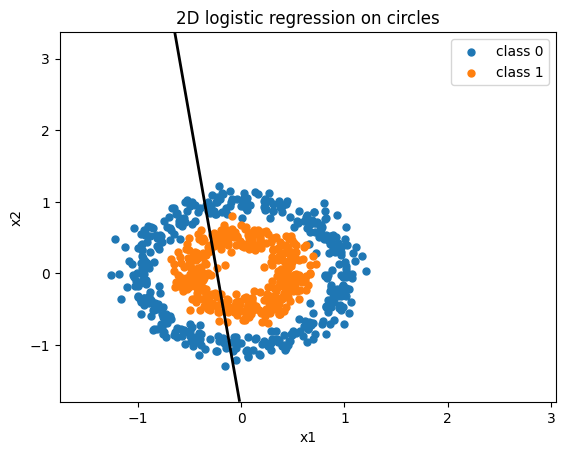

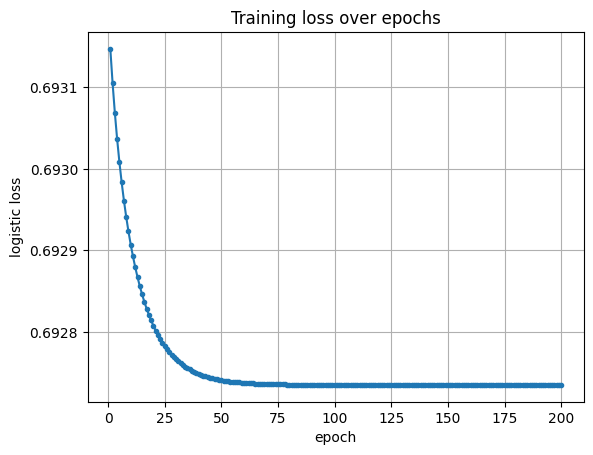

In [ ]:
Xtrain_aug = np.c_[X_train, np.ones(X_train.shape[0])]
W = np.zeros(3)  # [w1, w2, b]
lr = 0.5
epochs = 200
loss_hist2 = []

for epoch in range(epochs):
    # TODO: compute probabilities
    p = sigmoid(Xtrain_aug @ W)
    # TODO: compute loss and append
    loss = -np.mean(y_train * np.log(p + 1e-8) + (1 - y_train) * np.log(1 - p + 1e-8))

    loss_hist2.append(loss)
    # TODO: compute gradient and update W
    grad = Xtrain_aug.T @ (p - y_train) / len(y_train)
    W -= lr * grad
print(f"Linear model log loss: {loss:.4f}")




# Plot boundary (p=0.5)
xx, yy = np.meshgrid(np.linspace(X[:,0].min()-0.5, X2[:,0].max()+0.5, 300),
                     np.linspace(X[:,1].min()-0.5, X2[:,1].max()+0.5, 300))
grid = np.c_[xx.ravel(), yy.ravel(), np.ones(xx.size)]
pp = sigmoid(grid @ W).reshape(xx.shape)
plt.contour(xx, yy, pp, levels=[0.5], colors='k', linewidths=2)
plt.scatter(X[y==0,0], X[y==0,1], s=25, label="class 0")
plt.scatter(X[y==1,0], X[y==1,1], s=25, label="class 1")
plt.legend(); plt.title("2D logistic regression on circles")
plt.xlabel("x1"); plt.ylabel("x2")
plt.show()

# Plot loss curve
plt.plot(np.arange(1, epochs+1), loss_hist2, marker='o', ms=3)
plt.xlabel("epoch"); plt.ylabel("logistic loss")
plt.title("Training loss over epochs")
plt.grid(True); plt.show()





Polynomial model log loss: 0.2190


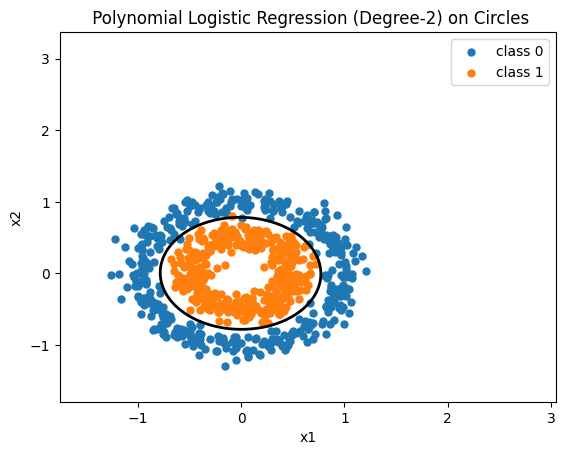

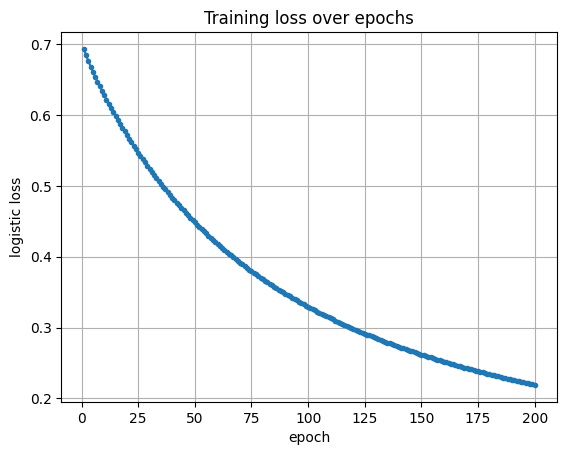

In [ ]:
def phi_circle(x):
    x1, x2 = x
    return np.array([x1, x2, x1**2, x2**2, x1*x2, 1.0], dtype=float)
Phi = np.vstack([phi_circle(x) for x in X])  # shape: n_samples x 6
X_train_poly, X_val_poly, y_train, y_val = train_test_split(Phi, y, test_size=0.3, random_state=42)

W = np.zeros(X_train_poly.shape[1])  # initialize weights
lr = 0.5
epochs = 200
loss_hist = []

for epoch in range(epochs):
    # predicted probability
    p = sigmoid(X_train_poly @ W)
    # logistic loss
    lossp = -np.mean(y_train * np.log(p + 1e-8) + (1 - y_train) * np.log(1 - p + 1e-8))

    loss_hist.append(lossp)
    # gradient update
    grad = X_train_poly.T @ (p - y_train) / len(y_train)
    W -= lr * grad
print(f"Polynomial model log loss: {lossp:.4f}")


xx, yy = np.meshgrid(np.linspace(X[:,0].min()-0.5, X2[:,0].max()+0.5, 300),
                     np.linspace(X[:,1].min()-0.5, X2[:,1].max()+0.5, 300))
grid_poly = np.c_[xx.ravel(), yy.ravel(),xx.ravel()**2, yy.ravel()**2, xx.ravel()*yy.ravel(), np.ones(xx.size)]
pp = sigmoid(grid_poly @ W).reshape(xx.shape)
plt.contour(xx, yy, pp, levels=[0.5], colors='k', linewidths=2)
plt.scatter(X[y==0,0], X[y==0,1], s=25, label="class 0")
plt.scatter(X[y==1,0], X[y==1,1], s=25, label="class 1")
plt.legend(); plt.title(" Polynomial Logistic Regression (Degree-2) on Circles")
plt.xlabel("x1"); plt.ylabel("x2")
plt.show()

#Plot log loss
# Plot loss curve
plt.plot(np.arange(1, epochs+1), loss_hist, marker='o', ms=3)
plt.xlabel("epoch"); plt.ylabel("logistic loss")
plt.title("Training loss over epochs")
plt.grid(True); plt.show()


In [ ]:
print(f"Log loss drop: {loss - lossp:.4f}")


Log loss drop: 0.4737


We have the log loss drop of 0.4737 when comparing linear and polinomial model. For the concentric circles dataset, a linear logistic regression fails because the classes are not linearly separable. As a result, the model makes many misclassifications, leading to a higher log loss. By adding quadratic features such as

$
x_1^2, \quad x_2^2, \quad \text{and} \quad x_1 x_2
$

the model can learn a curved decision boundary that follows the radial pattern of the circles. This allows it to assign higher probabilities to the correct classes, reducing the log loss and improving overall classification.


## AI Use Reflection

Briefly describe any use of AI tools (e.g., ChatGPT, Copilot, Grammarly) on this assignment. For each tool used, indicate what you asked it to do and how you validated the output.

- If AI-generated code or text appears in your submission, note the **location** (cell/section) and provide a short explanation of edits you made.
- Reflect on benefits and risks: Did AI improve clarity or efficiency? What errors or biases did you encounter? How did you ensure you understood the math/code you submitted?

**Checklist**  
- [ +] I can re-derive key formulas and explain my code without AI.  
- [ +] I verified outputs against known results or manual checks.  
- [+ ] I cited all AI assistance and collaborators.

I used ChatGPT to explain this syntax:  lam*W[:,2], but then it says it should be  lam*W[:2] because the W is a 1D array. I used it to help me to write the math notation in google colab because i didnt know the syntax. I used Grammarly to fix grammar for my text responces